/home/chris/projects/rfmri/pig/envi/lib/python3.5/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


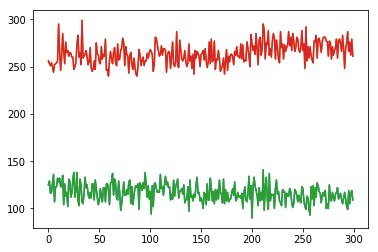

12340
12340


In [19]:
import sys
import numpy as np
from keras.models import load_model
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import keras
import os
from sklearn.cluster import SpectralClustering
import nibabel as nib


# number of clusters
num_clusters = 2
gamma = .01
num_jobs = 4

name = 'filter_32_64_128_256-40_10_5_5_slice_10'
################################################################################
# Load Model, data, and first layer activations
################################################################################
model = load_model('./Brandon Model/brandon_model_healthy_pig_50_epochs_pig_2_2017_09_22_(filter_32_64_128_256)_20_10_5_5.h5')

mask = np.load('/home/chris/projects/rfmri/Data/pig_2/brandon/mask_2017_09_18.npy')
raw = np.load("./fmri_preprocessed_2017_09_18.npy") # 16,000 voxels
x,y,z = mask.nonzero()
slice_mask = ((z >= 7) & (z <= 16))
new_x = x[slice_mask]
new_y = y[slice_mask]
new_z = z[slice_mask] 
alice_voxel = raw[slice_mask] # 12,340

brandon_voxel = np.load('./healthy_pig_fMRI_preprocessed_10_slices.npy')

plt.plot(brandon_voxel[1])
plt.plot(alice_voxel[1])
plt.show()

print(len(alice_voxel))
print(len(brandon_voxel))
# test = np.transpose(test)
# test = test.astype(float)
# scaler = preprocessing.StandardScaler().fit(test)
# test = scaler.transform(test)
# test = np.transpose(test)
# test = np.expand_dims(test, axis=2)


# # I know this says first layer but I'm using the last layer here
# first_layer_model = keras.models.Model(inputs=model.input, outputs=model.layers[0].output)
# first_layer_activation_matrix = first_layer_model.predict(test)

# ################################################################################
# # Spectral Clustering with Nystrom Approximation
# ################################################################################


# # cluster_values = np.zeros((np.shape(first_layer_activation_matrix)[0],np.shape(first_layer_activation_matrix)[2]))


In [15]:
# for i in range(np.shape(first_layer_activation_matrix)[2]):
#     cluster_values[:,i] = SpectralClustering(n_clusters=num_clusters,gamma=gamma, n_jobs=num_jobs).fit_predict(first_layer_activation_matrix[:,:,i])

# cluster_values = cluster_values + 1

################################################################################
# Spectral Clustering with Nystrom Approximation
################################################################################

cluster_values = SpectralClustering(n_clusters=5, gamma=gamma, n_jobs=4).fit_predict(first_layer_activation_matrix[:,:,2])

np.save('./Brandon Straight/5_clusters_filter_2_alice.npy', cluster_values)

In [34]:
mask = np.load('/home/chris/projects/rfmri/Data/pig_2/brandon/mask_2017_09_18.npy')
raw = np.load("./fmri_preprocessed_2017_09_18.npy") # 16,000 voxels

x,y,z = mask.nonzero()

print(x[0])
print(y[0])
print(z[0])

slice_mask = ((z >= 7) & (z <= 16))
new_x = x[slice_mask]
new_y = y[slice_mask]
new_z = z[slice_mask] 

print(new_x[0])
print(new_y[0])
print(new_z[0])

print(np.unique(new_z))

# # alice_voxel = raw[slice_mask] # 12,340
# # brandon_voxel = np.load('./healthy_pig_fMRI_preprocessed_10_slices.npy')

# print(len(brandon_voxel))
# print(len(alice_voxel))
# print(np.mean(brandon_voxel))
# print(np.mean(alice_voxel))
# print(np.max(brandon_voxel))
# print(np.max(alice_voxel))
# print(np.min(brandon_voxel))
# print(np.min(alice_voxel))
# # plt.plot(brandon_voxel[1])
# # plt.plot(alice_voxel[1])
# # plt.show()

# print(len(alice_voxel))
# print(len(brandon_voxel))

44
62
9
44
62
9
[ 7  8  9 10 11 12 13 14 15 16]
